Ferrybox data

In [75]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cmo

In [76]:
# Skip metadata lines (those starting with "$" or empty)
skiprows = 0
with open(r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\2025-05-08_07.24.29_Skagen_to__741601.txt", 'r', encoding='latin1') as f:
    for i, line in enumerate(f):
        if line.strip().startswith("Date") and "Time" in line:
            skiprows = i
            break

# Load the actual data, starting from the header line
df = pd.read_csv(
    #'2025-05-06_07.35.09__to__741601.txt'
    #'2025-05-07_07.11.44_Skagen_to__741601.txt',
    r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\2025-05-08_07.24.29_Skagen_to__741601.txt",
    sep='\s+',              # separator = multiple spaces or tabs
    skiprows=skiprows,      # skip metadata lines
    encoding='latin1'       # use latin1 to handle special characters like ° 
)

# Combine 'Date' and 'Time' columns into a single datetime columnn
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Display the first few rows of the DataFrame
print(df.head())
print(df.datetime.min(), df.datetime.max())

         Date      Time   Latitude  Longitude     Course  Speed  Temp_SBE45  \
0  2025.05.08  07:25:00  57.713260  10.611424  79.933661  10.25   19.064853   
1  2025.05.08  07:26:00  57.713796  10.617191  79.563275  11.00   12.327105   
2  2025.05.08  07:27:00  57.714330  10.623201  80.924812  11.00   11.435147   
3  2025.05.08  07:28:00  57.714776  10.629281  81.852500  11.00   11.406810   
4  2025.05.08  07:29:00  57.715236  10.635360  81.195489  11.00   11.322159   

   Cond_SBE45  Salinity_SBE45  SoundVel_SBE45  ...  Temperature_Optode  \
0    1.272401        9.314262     1490.002845  ...           21.539600   
1    3.535214       30.238640     1492.243621  ...           16.874333   
2    3.435988       30.008845     1488.896190  ...           13.495000   
3    3.400082       29.684083     1488.407483  ...           12.640800   
4    3.366126       29.422907     1487.795931  ...           12.252000   

         pH  Chlorophyll  Turbidity    pressure  flow_main  flow_SBE45  \
0  4.9

In [77]:
df

,Date,Time,Latitude,Longitude,Course,Speed,Temp_SBE45,Cond_SBE45,Salinity_SBE45,SoundVel_SBE45,...,Temperature_Optode,pH,Chlorophyll,Turbidity,pressure,flow_main,flow_SBE45,Phycocyanin,CDOM,datetime
0,2025.05.08,07:25:00,57.713260,10.611424,79.933661,10.250000,19.064853,1.272401,9.314262,1490.002845,...,21.539600,4.930114,0.065450,3.823779,154.225955,2.891215,1.019844,1.572083,-0.013333,2025-05-08 07:25:00
1,2025.05.08,07:26:00,57.713796,10.617191,79.563275,11.000000,12.327105,3.535214,30.238640,1492.243621,...,16.874333,8.838098,0.290905,3.578834,199.767172,8.581661,3.023265,0.633500,-0.012292,2025-05-08 07:26:00
2,2025.05.08,07:27:00,57.714330,10.623201,80.924812,11.000000,11.435147,3.435988,30.008845,1488.896190,...,13.495000,8.948782,0.276958,3.614914,199.492347,8.600821,3.078278,0.548333,-0.012500,2025-05-08 07:27:00
3,2025.05.08,07:28:00,57.714776,10.629281,81.852500,11.000000,11.406810,3.400082,29.684083,1488.407483,...,12.640800,8.976655,0.212193,3.528770,200.522942,8.617876,3.094214,0.539000,-0.015625,2025-05-08 07:28:00
4,2025.05.08,07:29:00,57.715236,10.635360,81.195489,11.000000,11.322159,3.366126,29.422907,1487.795931,...,12.252000,8.991906,0.208322,3.508276,200.292443,8.639583,3.098994,0.539000,-0.014792,2025-05-08 07:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2025.05.08,13:12:00,57.638496,11.650834,70.002604,8.820312,11.485521,2.866192,24.526834,1482.518397,...,11.669333,9.100098,0.396667,1.436882,198.299960,8.364591,3.082295,0.752500,-0.017083,2025-05-08 13:12:00
348,2025.05.08,13:13:00,57.639379,11.654892,66.361979,7.278646,11.550995,2.825029,24.096572,1482.238310,...,11.691200,9.111398,0.457935,1.468833,194.964378,8.363262,3.074161,0.824471,-0.014391,2025-05-08 13:13:00
349,2025.05.08,13:14:00,57.640176,11.658264,64.705729,6.130208,11.528721,2.805852,23.930964,1481.961241,...,11.696500,9.118404,0.506742,1.524246,194.691769,8.347536,3.073530,0.845250,-0.017083,2025-05-08 13:14:00
350,2025.05.08,13:15:00,57.640952,11.661359,64.786458,6.000000,11.557531,2.788179,23.746614,1481.844138,...,11.713667,9.119689,0.546540,1.583599,193.240071,8.343881,3.066425,0.845250,-0.016875,2025-05-08 13:15:00


In [78]:
diff = df['Temp_in_SBE38'] - df['Temp_SBE45']

In [79]:
print(df['Temp_in_SBE38'].max())
print(diff.max())

1652.141541
1640.6788589999999


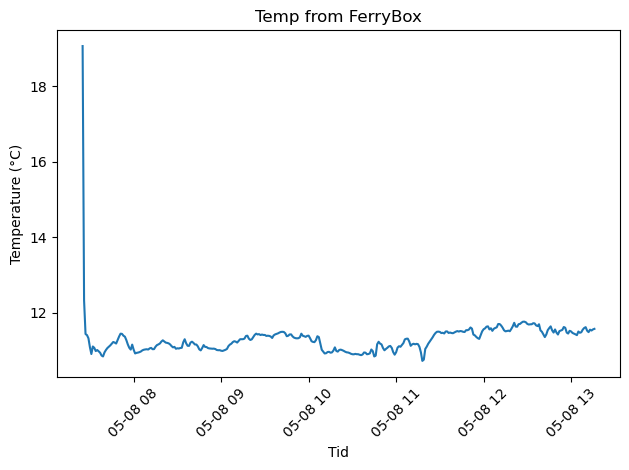

In [80]:
#plt.plot(df['datetime'], df['Temp_in_SBE38'])
plt.plot(df['datetime'], df['Temp_SBE45'])
plt.xlabel('Tid')
plt.ylabel('Temperature (°C)')
plt.title('Temp from FerryBox')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
df

,Date,Time,Latitude,Longitude,Course,Speed,Temp_SBE45,Cond_SBE45,Salinity_SBE45,SoundVel_SBE45,...,Temperature_Optode,pH,Chlorophyll,Turbidity,pressure,flow_main,flow_SBE45,Phycocyanin,CDOM,datetime
0,2025.05.08,07:25:00,57.713260,10.611424,79.933661,10.250000,19.064853,1.272401,9.314262,1490.002845,...,21.539600,4.930114,0.065450,3.823779,154.225955,2.891215,1.019844,1.572083,-0.013333,2025-05-08 07:25:00
1,2025.05.08,07:26:00,57.713796,10.617191,79.563275,11.000000,12.327105,3.535214,30.238640,1492.243621,...,16.874333,8.838098,0.290905,3.578834,199.767172,8.581661,3.023265,0.633500,-0.012292,2025-05-08 07:26:00
2,2025.05.08,07:27:00,57.714330,10.623201,80.924812,11.000000,11.435147,3.435988,30.008845,1488.896190,...,13.495000,8.948782,0.276958,3.614914,199.492347,8.600821,3.078278,0.548333,-0.012500,2025-05-08 07:27:00
3,2025.05.08,07:28:00,57.714776,10.629281,81.852500,11.000000,11.406810,3.400082,29.684083,1488.407483,...,12.640800,8.976655,0.212193,3.528770,200.522942,8.617876,3.094214,0.539000,-0.015625,2025-05-08 07:28:00
4,2025.05.08,07:29:00,57.715236,10.635360,81.195489,11.000000,11.322159,3.366126,29.422907,1487.795931,...,12.252000,8.991906,0.208322,3.508276,200.292443,8.639583,3.098994,0.539000,-0.014792,2025-05-08 07:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2025.05.08,13:12:00,57.638496,11.650834,70.002604,8.820312,11.485521,2.866192,24.526834,1482.518397,...,11.669333,9.100098,0.396667,1.436882,198.299960,8.364591,3.082295,0.752500,-0.017083,2025-05-08 13:12:00
348,2025.05.08,13:13:00,57.639379,11.654892,66.361979,7.278646,11.550995,2.825029,24.096572,1482.238310,...,11.691200,9.111398,0.457935,1.468833,194.964378,8.363262,3.074161,0.824471,-0.014391,2025-05-08 13:13:00
349,2025.05.08,13:14:00,57.640176,11.658264,64.705729,6.130208,11.528721,2.805852,23.930964,1481.961241,...,11.696500,9.118404,0.506742,1.524246,194.691769,8.347536,3.073530,0.845250,-0.017083,2025-05-08 13:14:00
350,2025.05.08,13:15:00,57.640952,11.661359,64.786458,6.000000,11.557531,2.788179,23.746614,1481.844138,...,11.713667,9.119689,0.546540,1.583599,193.240071,8.343881,3.066425,0.845250,-0.016875,2025-05-08 13:15:00


In [82]:
print(df.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Course', 'Speed',
       'Temp_SBE45', 'Cond_SBE45', 'Salinity_SBE45', 'SoundVel_SBE45',
       'Temp_in_SBE38', 'Oxygen', 'Saturation', 'Temperature_Optode', 'pH',
       'Chlorophyll', 'Turbidity', 'pressure', 'flow_main', 'flow_SBE45',
       'Phycocyanin', 'CDOM', 'datetime'],
      dtype='object')


In [83]:
print(df['Temp_SBE45'].max())
print(df['Temp_SBE45'].min())
print(df['Temp_SBE45'].mean())
print('----')
print(df['Temp_in_SBE38'].max())
print(df['Temp_in_SBE38'].min())
print(df['Temp_in_SBE38'].mean())


19.064853
10.723905
11.298950769886362
----
1652.141541
10.433354
15.788132417613637


In [84]:
print(df['Salinity_SBE45'].max())
print(df['Salinity_SBE45'].min())
print(df['Salinity_SBE45'].mean())

30.494702
9.314262
28.01226359659091


In [85]:
bad_val = 1652.141541
df.loc[df['Temp_in_SBE38'] == bad_val, 'Temp_in_SBE38'] = np.nan

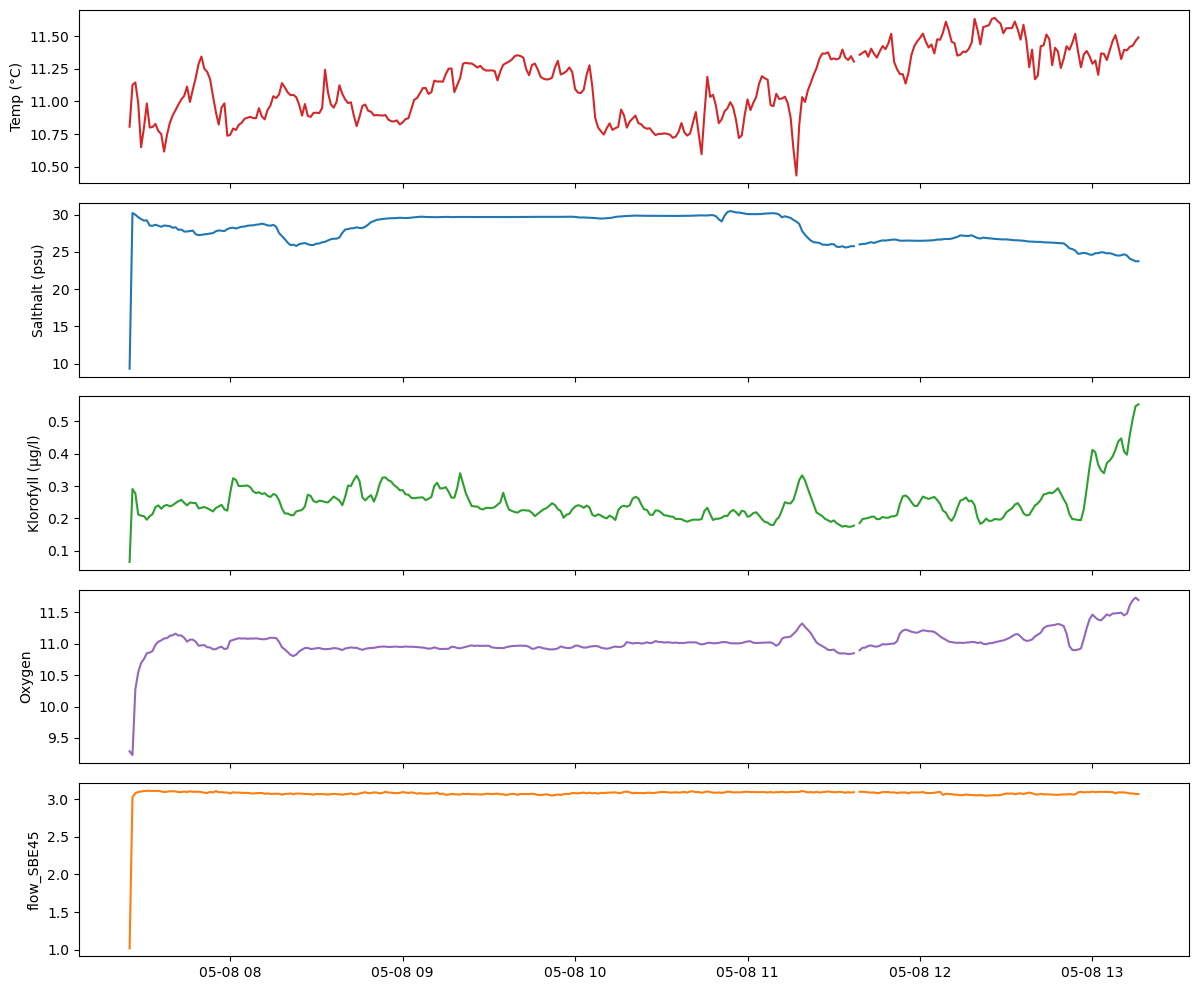

In [93]:
fig, axs = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

# Temperatur
axs[0].plot(df['datetime'], df['Temp_in_SBE38'], label='Temperatur (°C)', color='tab:red')
axs[0].set_ylabel('Temp (°C)')

# Salthalt
axs[1].plot(df['datetime'], df['Salinity_SBE45'], label='Salinity (psu)', color='tab:blue')
axs[1].set_ylabel('Salthalt (psu)')

# Klorofyll
axs[2].plot(df['datetime'], df['Chlorophyll'], label='Chlorophyll (µg/l)', color='tab:green')
axs[2].set_ylabel('Klorofyll (µg/l)')

# pH
axs[3].plot(df['datetime'], df['Oxygen'], label='Oxygen', color='tab:purple')
axs[3].set_ylabel('Oxygen')

axs[4].plot(df['datetime'], df['flow_SBE45'], label='flow_sbe45', color='tab:orange')
axs[4].set_ylabel('flow_SBE45')

plt.tight_layout()
plt.show()

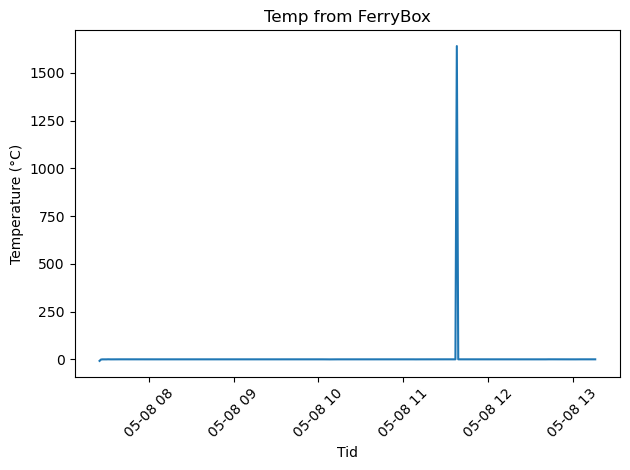

In [87]:
#plt.plot(df['datetime'], df['Temp_in_SBE38'])
plt.plot(df['datetime'], diff)
plt.xlabel('Tid')
plt.ylabel('Temperature (°C)')
plt.title('Temp from FerryBox')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
bad_val = 1640.6788589999999
df.loc[diff == bad_val] = np.nan

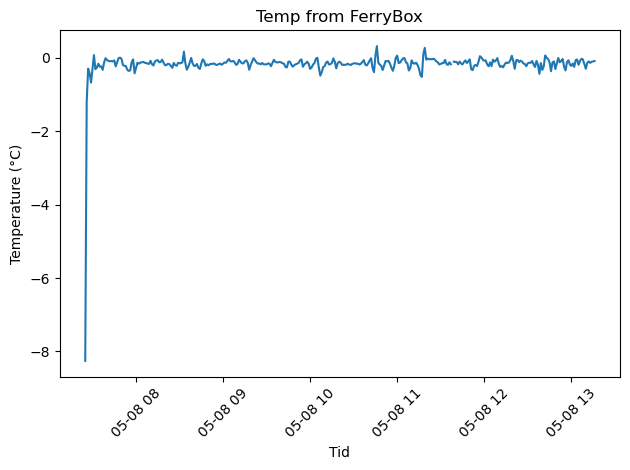

In [89]:
#plt.plot(df['datetime'], df['Temp_in_SBE38'])
plt.plot(df['datetime'], diff)
plt.xlabel('Tid')
plt.ylabel('Temperature (°C)')
plt.title('Temp from FerryBox')
plt.xticks(rotation=45)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

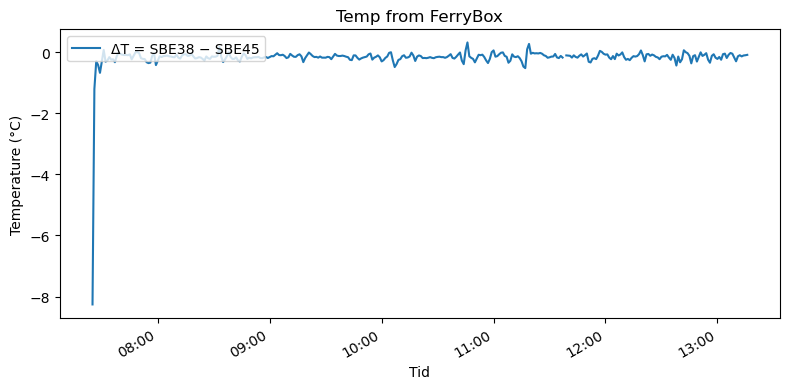

In [90]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ------------------------------------------------------------
#  Figure / axis objects first
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 4))          # you can change the size

# ------------------------------------------------------------
#  Plot the series you want (difference in °C)
# ------------------------------------------------------------
ax.plot(df['datetime'], diff, label='ΔT = SBE38 − SBE45')

# ------------------------------------------------------------
#  Labels, title, legend
# ------------------------------------------------------------
ax.set_xlabel('Tid')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temp from FerryBox')
ax.legend(loc='upper left')

# ------------------------------------------------------------
#  Nice HH:MM ticks
# ------------------------------------------------------------
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()        # tilt the labels 45 °

plt.tight_layout()
plt.show()


In [95]:
print(df.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Course', 'Speed',
       'Temp_SBE45', 'Cond_SBE45', 'Salinity_SBE45', 'SoundVel_SBE45',
       'Temp_in_SBE38', 'Oxygen', 'Saturation', 'Temperature_Optode', 'pH',
       'Chlorophyll', 'Turbidity', 'pressure', 'flow_main', 'flow_SBE45',
       'Phycocyanin', 'CDOM', 'datetime'],
      dtype='object')


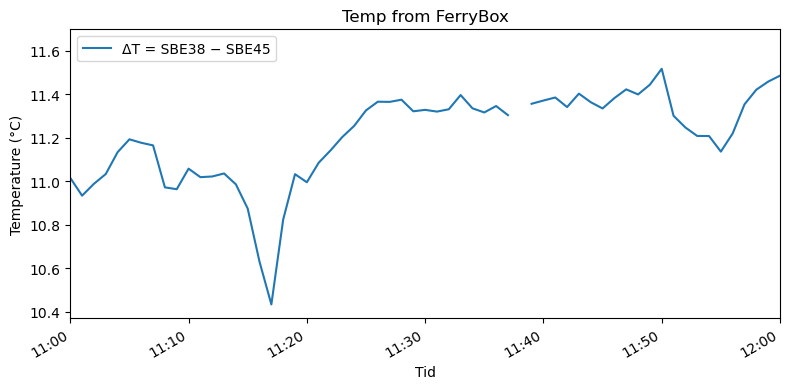

In [96]:
fig, ax = plt.subplots(figsize=(8, 4))          # you can change the size
ax.plot(df['datetime'], df['Temp_in_SBE38'], label='ΔT = SBE38 − SBE45')

# >>> add these two lines <<<
ax.set_xlim(pd.Timestamp('2025-05-08 11:00'),
            pd.Timestamp('2025-05-08 12:00'))
#ax.set_ylim(-0.5,0.5)
ax.set_xlabel('Tid')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temp from FerryBox')
ax.legend(loc='upper left')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

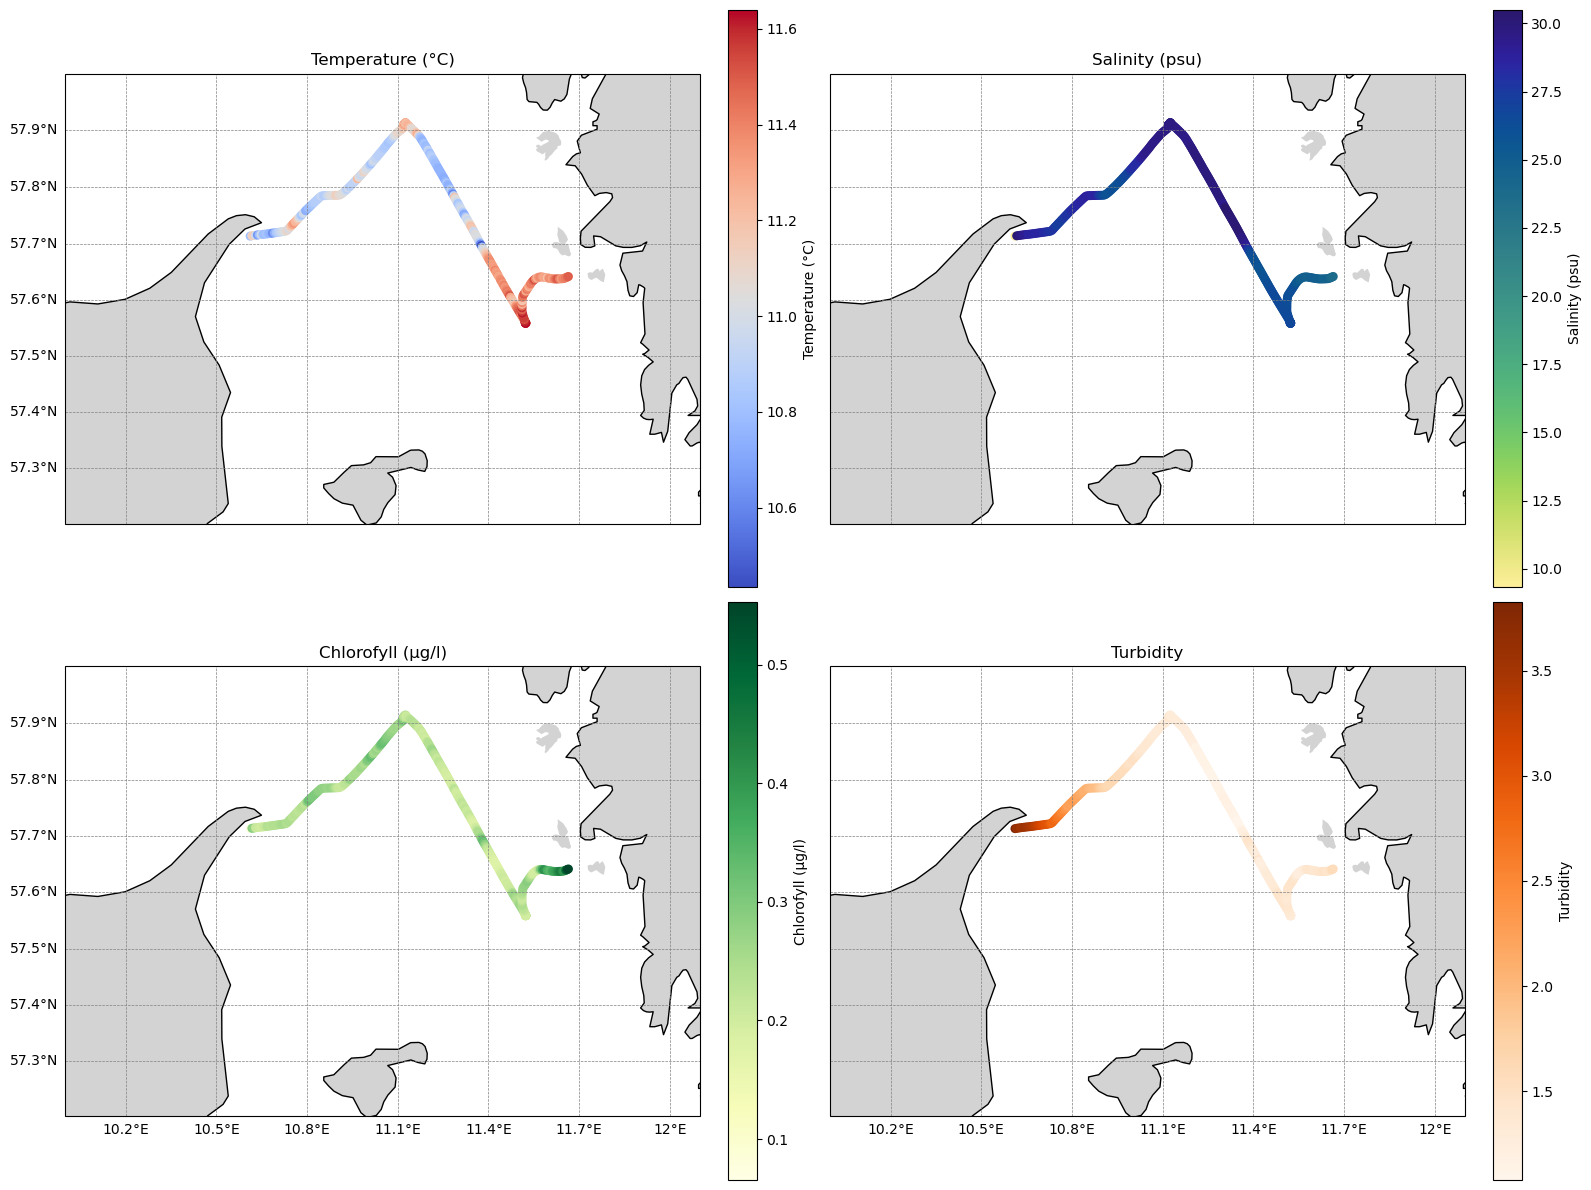

In [35]:
lon = df['Longitude']
lat = df['Latitude']

variables = ['Temp_in_SBE38', 'Salinity_SBE45', 'Chlorophyll', 'Turbidity']
titles = ['Temperature (°C)', 'Salinity (psu)', 'Chlorofyll (µg/l)', 'Turbidity']
cmaps = ['coolwarm', 'cmo.haline_r', 'YlGn', 'Oranges']

# Area
#extent = [lon.min() - 0.2, lon.max() + 0.2, lat.min() - 0.2, lat.max() + 0.2]
extent = [10, 12.1, 57.2, 58]

fig, axs = plt.subplots(2, 2, figsize=(16, 12), subplot_kw={'projection': ccrs.Mercator()})
axs = axs.flatten()

for i, ax in enumerate(axs):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)

    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
    gl.top_labels = gl.right_labels = False
    if i % 2 != 0:
        gl.left_labels = False
    if i < 2:
        gl.bottom_labels = False

    # Plot variables as scatter
    sc = ax.scatter(lon, lat, c=df[variables[i]], cmap=cmaps[i],
                    s=30, transform=ccrs.PlateCarree())
    
    # Colormap
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label(titles[i])

    ax.set_title(titles[i])

plt.tight_layout()
plt.show()